## Reading the data

#### Data can be treated as python dictionary objects. A simple script to read any of the above the data is as follows

In [ ]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

# Pandas dataframe

This code reads the data into a pandas data frame

In [ ]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Musical_Instruments_5.json.gz')

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

## Exploratory Data Analysis

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
# Data Exploration
print("Data shape:", df.shape)
print("Columns:", df.columns)



Data shape: (231392, 12)
Columns: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231392 entries, 0 to 231391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         231392 non-null  float64
 1   verified        231392 non-null  bool   
 2   reviewTime      231392 non-null  object 
 3   reviewerID      231392 non-null  object 
 4   asin            231392 non-null  object 
 5   reviewerName    231367 non-null  object 
 6   reviewText      231344 non-null  object 
 7   summary         231341 non-null  object 
 8   unixReviewTime  231392 non-null  int64  
 9   vote            34777 non-null   object 
 10  style           121310 non-null  object 
 11  image           3889 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 21.4+ MB


In [ ]:
#checking missing values
df.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          25
reviewText            48
summary               51
unixReviewTime         0
vote              196615
style             110082
image             227503
dtype: int64

In [ ]:
# Removing reviewText missing values
df= df.dropna(subset=['reviewText'])

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
df.value_counts('verified')

verified
True     207265
False     24079
dtype: int64

In [ ]:
# Removing unverified entries
df = df[df['verified'] == True]

NameError: ignored

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
df.shape

(207265, 12)

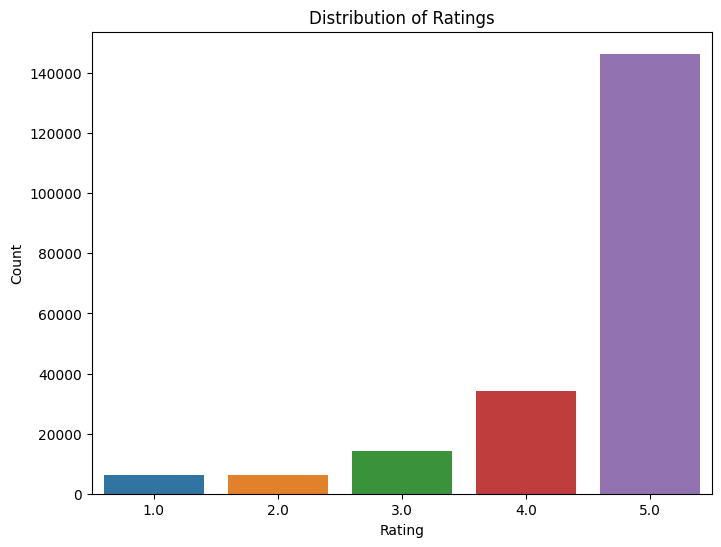

In [ ]:
# Display the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


<ipython-input-15-3194ea191c13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].astype(str)
<ipython-input-15-3194ea191c13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))


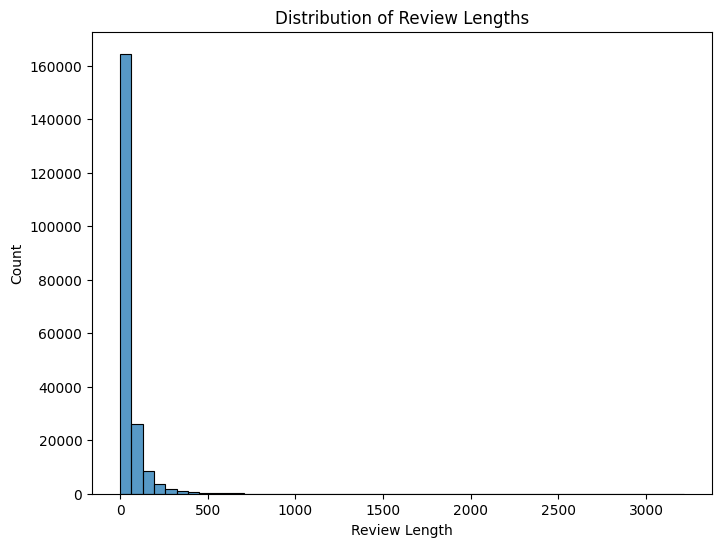

In [ ]:
# Convert 'reviewText' column to strings
df['reviewText'] = df['reviewText'].astype(str)

# Display the distribution of review lengths
df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()

In [ ]:
# Display the word cloud of reviews
from wordcloud import WordCloud



In [ ]:
text = " ".join(review for review in df['reviewText'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

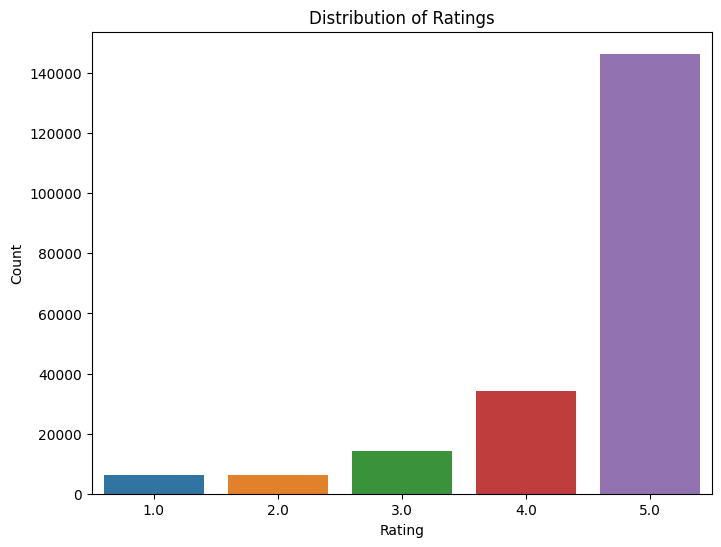

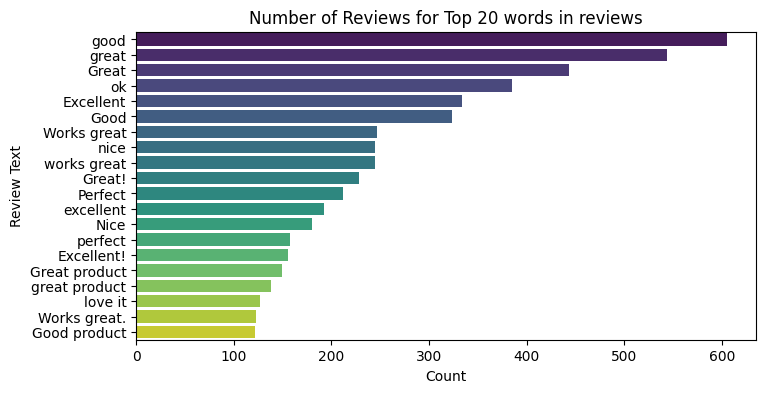

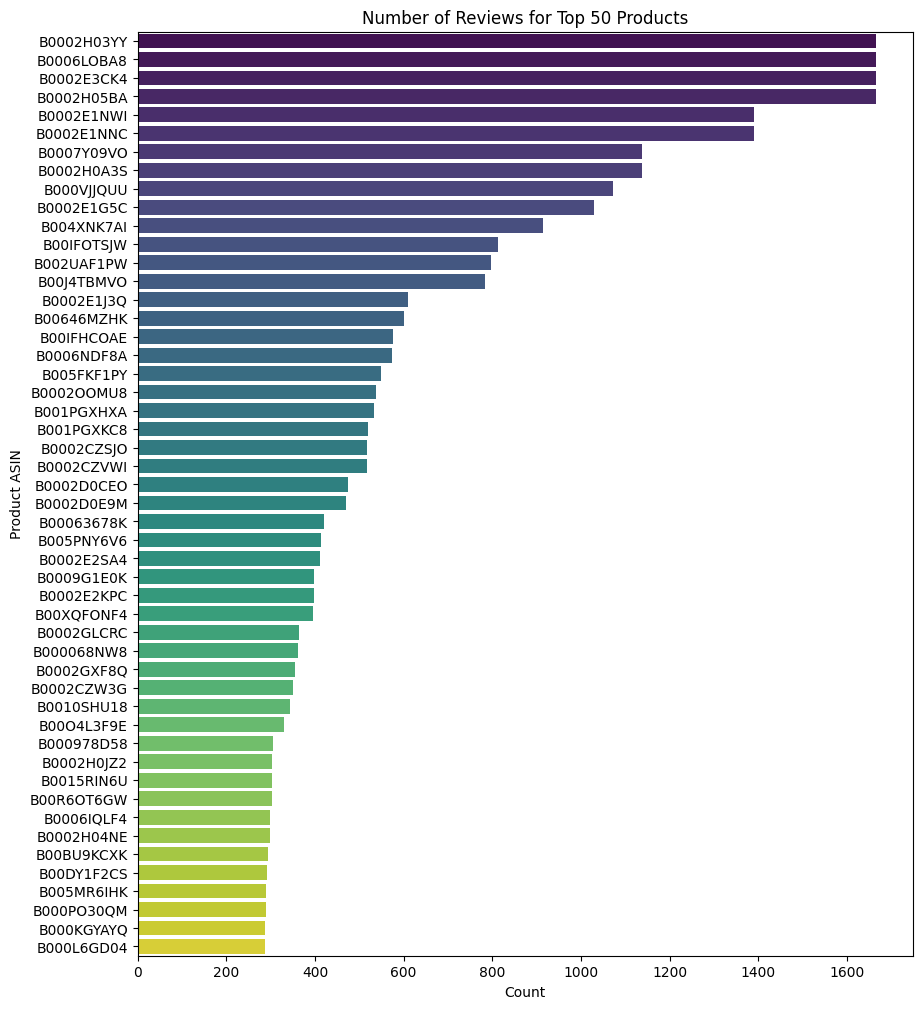

In [ ]:
# Fig. 3: Distribution of rating
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Number of reviews for top 20 reviews
top_20_reviews = df['reviewText'].value_counts().head(20)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_20_reviews.values, y=top_20_reviews.index, palette='viridis')
plt.title("Number of Reviews for Top 20 words in reviews")
plt.xlabel("Count")
plt.ylabel("Review Text")
plt.show()

# Number of reviews for top 50 products
top_50_products = df['asin'].value_counts().head(50)
plt.figure(figsize=(10, 12))
sns.barplot(x=top_50_products.values, y=top_50_products.index, palette='viridis')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel("Count")
plt.ylabel("Product ASIN")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming you have a DataFrame named df with the 'reviewText' column
reviews = df['reviewText'].tolist()

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

polarities, subjectivities = zip(*[get_sentiment(review) for review in reviews])



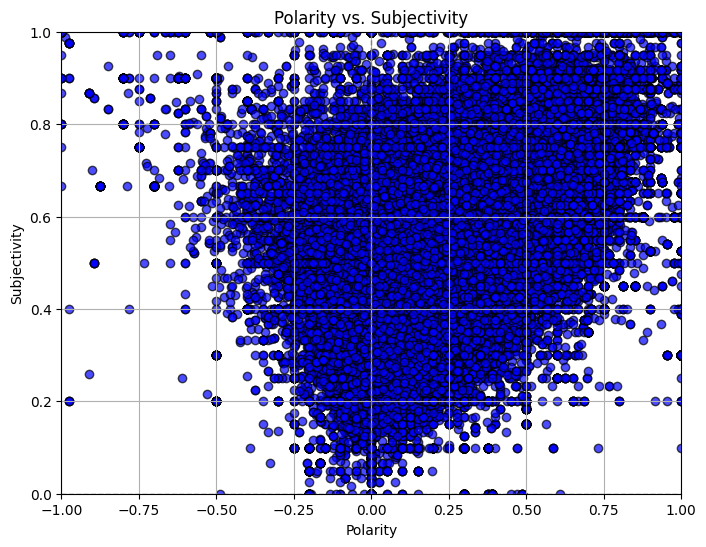

In [ ]:
# Visualization of Polarity and Subjectivity
plt.figure(figsize=(8, 6))
plt.scatter(polarities, subjectivities, color='blue', edgecolors='black', alpha=0.7)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Polarity vs. Subjectivity')
plt.grid(True)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,review_length
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN,4
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN,15
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN,12
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN,894
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN,3
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN,9
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN,6
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN,13


In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['Tokens'] = df['reviewText'].apply(word_tokenize)

<ipython-input-23-6c9ff84945b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['reviewText'].apply(word_tokenize)


## Data Preprocessing and Data Cleaning

In [ ]:
# The function of data cleaning and preprocessing
def preprocess_text(text):
    # Remove HTML tags or special characters
    text = re.sub('<.*?>', '', text)
    text = re.sub(r"[^\w\s]", '', text)

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text (split into individual words or tokens)
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Perform lemmatization to reduce words to their base or root form
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

df['clean_text'] = df['reviewText'].apply(preprocess_text)
df = df[['reviewText','clean_text', 'overall']]  # Keep only relevant columns (clean_text and overall)


<ipython-input-25-db3497391944>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['reviewText'].apply(preprocess_text)


In [ ]:
df

,reviewText,clean_text,overall
0,It's good for beginners,good beginner,5.0
1,I recommend this starter Ukulele kit. I has e...,recommend starter ukulele kit everything need ...,5.0
2,G'daughter received this for Christmas present...,gdaughter received christmas present last year...,5.0
3,"According to my order history, I bought this t...",according order history bought kit towards end...,4.0
4,Please pay attention better than I did to the ...,please pay attention better review poor qualit...,1.0
...,...,...,...
231387,It's pretty great.,pretty great,5.0
231388,Good inexpensive wiring harness. It will do th...,good inexpensive wiring harness job,5.0
231389,Easily installed and worked as expected.,easily installed worked expected,4.0
231390,The description stated they were full size pot...,description stated full size pot sent back,1.0


In [ ]:
# Labeling the Data
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(label_sentiment)

<ipython-input-27-1488c3b258a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['overall'].apply(label_sentiment)


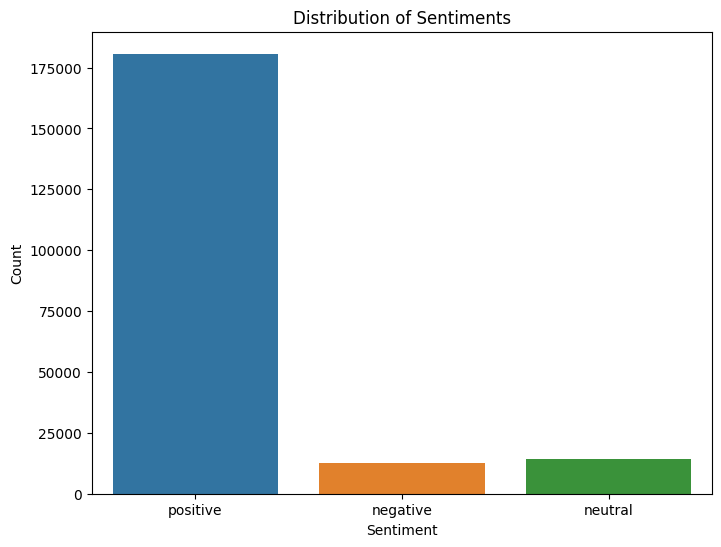

In [ ]:
# Fig. 3: Distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
df = df[df['sentiment'] != 'neutral']

In [ ]:
df.value_counts('sentiment')

sentiment
positive    180705
negative     12415
dtype: int64

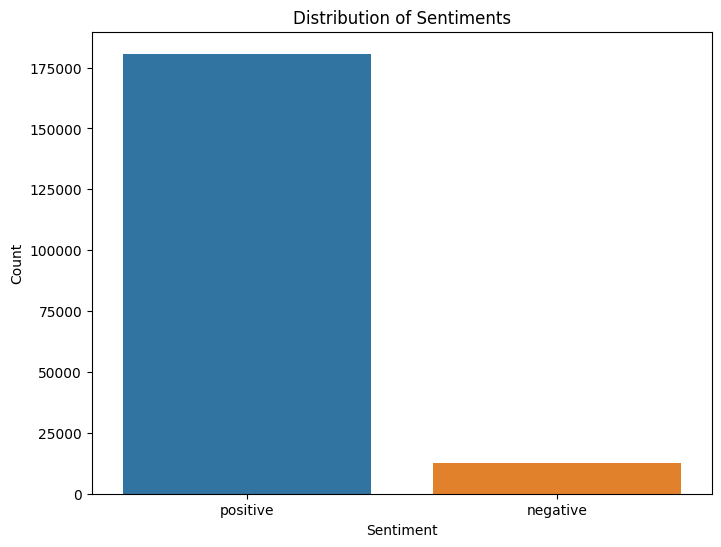

In [ ]:
# Fig. 3: Distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Split the Data
X = df[['clean_text', 'reviewText']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Extraction Techniques - *BOW*

In [ ]:
# Feature Extraction (Bag-of-Words)
# Bag-of-Words using CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_count = count_vectorizer.fit_transform(X_train['clean_text'])
X_test_count = count_vectorizer.transform(X_test['clean_text'])


In [ ]:
X_train_count

<154496x74345 sparse matrix of type '<class 'numpy.int64'>'
	with 3129431 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

121714    positive
177232    positive
170019    negative
193727    positive
209820    positive
            ...   
143461    positive
123855    positive
158136    positive
175969    positive
146019    positive
Name: sentiment, Length: 154496, dtype: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Modelling with BOW


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model Training and Evaluation - Logistic Regression and Naive Bayes
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB())
]

Model: LogisticRegression(max_iter=1000)
Confusion Matrix: 
[[ 1258  1216]
 [  372 35778]]
Accuracy: 0.9588856669428335
Model: LogisticRegression(max_iter=1000)
Accuracy: 0.9588856669428335
Precision: 0.9671298048332162
Recall: 0.9897095435684647
F1 Score: 0.978289401728098


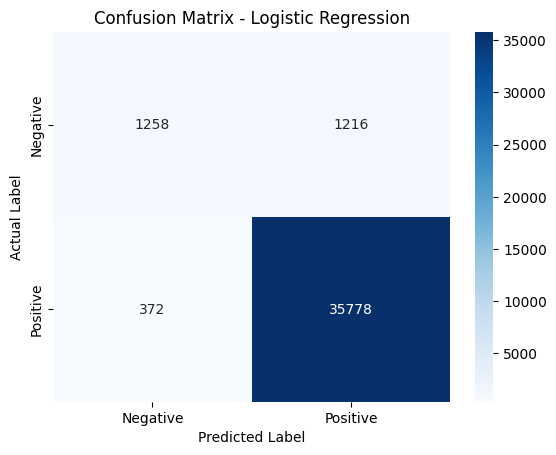

Model: MultinomialNB()
Confusion Matrix: 
[[  767  1707]
 [  169 35981]]
Accuracy: 0.9514291632145816
Model: MultinomialNB()
Accuracy: 0.9514291632145816
Precision: 0.9547070685629379
Recall: 0.9953250345781466
F1 Score: 0.9745930279801728


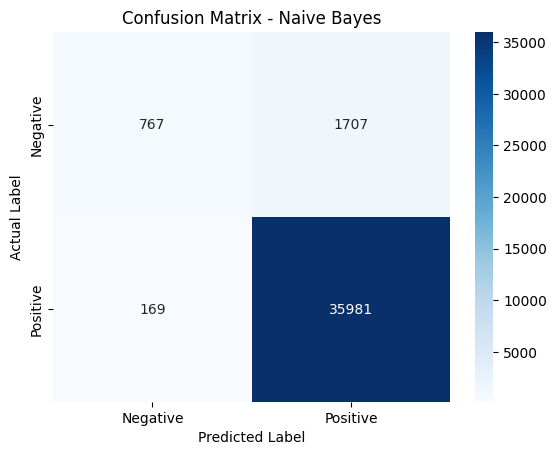

In [ ]:
for model_name, model in models:
    # Train the model
    model.fit(X_train_count, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_count)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Evaluate the model
    y_pred = model.predict(X_test_count)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='positive')
    recall = recall_score(y_test, y_pred, pos_label='positive')
    f1 = f1_score(y_test, y_pred, pos_label='positive')
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    labels = ['Negative', 'Positive'] # Assuming 0 is negative and 1 is positive
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

## Feature Extraction Techniques - *TF-IDF*

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the Transform
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Tokenize and build vocab
vectorizer.fit(X_train['clean_text'])

# Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# Encode document
tf_x_train = vectorizer.transform(X_train['clean_text'])
tf_x_test = vectorizer.transform(X_test['clean_text'])

# Summarize encoded vector
print(tf_x_train.shape)
print(tf_x_train.toarray())

{'bought': 11953, 'add': 5922, 'son': 60238, 'acoustic': 5710, 'drum': 21531, 'set': 57794, 'birthday': 11070, 'nice': 44034, 'cymbal': 18197, 'stand': 61631, 'boom': 11774, 'handle': 30634, '20': 1762, 'inch': 33673, 'ride': 55271, 'perfectly': 48320, 'great': 29416, 'complete': 16233, 'hardware': 30851, 'starter': 61825, 'dont': 20976, 'enough': 23458, 'single': 58916, 'know': 36753, 'need': 43735, 'minimum': 41447, 'crash': 17560, 'covered': 17381, 'id': 33171, 'rate': 52990, 'pedal': 47973, '355': 2858, 'since': 58877, 'cheap': 14545, 'rounded': 55923, 'decent': 18875, 'flaw': 26436, 'biggest': 10987, 'first': 26139, 'plug': 49710, 'hold': 32098, 'button': 13016, 'go': 28881, 'preset': 50862, 'mode': 41870, 'messed': 40613, 'way': 71651, 'around': 8239, 'back': 9426, 'effect': 22586, 'sound': 60407, 'right': 55310, 'happens': 30741, 'plugged': 49719, 'sure': 63655, 'using': 69996, 'holding': 32115, 'left': 37496, 'turn': 68098, 'onoff': 46033, 'step': 61993, 'presets': 50867, 'want

In [ ]:
tf_idf_data_train = pd.DataFrame(tf_x_train[0].T.todense(), index=vectorizer.get_feature_names_out())
tf_idf_data_train
print(tf_idf_data_train.head(25))

                    0
00                0.0
000               0.0
0000              0.0
0000000001        0.0
00005             0.0
000102            0.0
00015             0.0
00015m            0.0
00015s            0.0
00015sm           0.0
00017             0.0
00017sm           0.0
00018             0.0
0001mf            0.0
0001r             0.0
00025             0.0
00028             0.0
00028vs           0.0
0005              0.0
0009104579145000  0.0
000db             0.0
000ec28           0.0
000size           0.0
001               0.0
0010              0.0


In [ ]:
tf_idf_data_test = pd.DataFrame(tf_x_test[0].T.todense(), index=vectorizer.get_feature_names_out())
tf_idf_data_test
print(tf_idf_data_test.head(25))

                    0
00                0.0
000               0.0
0000              0.0
0000000001        0.0
00005             0.0
000102            0.0
00015             0.0
00015m            0.0
00015s            0.0
00015sm           0.0
00017             0.0
00017sm           0.0
00018             0.0
0001mf            0.0
0001r             0.0
00025             0.0
00028             0.0
00028vs           0.0
0005              0.0
0009104579145000  0.0
000db             0.0
000ec28           0.0
000size           0.0
001               0.0
0010              0.0


## Modelling with TF-IDF

In [ ]:
# Model Training and Evaluation - Logistic Regression, Naive Bayes and Support Vector Machine
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB()),
   ("Support Vector machine", SVC(C=0.1, kernel= 'linear', gamma='scale'))
]

Model: LogisticRegression(max_iter=1000)
Confusion Matrix: 
[[ 1012  1462]
 [  162 35988]]
Accuracy: 0.957953603976802
Model: LogisticRegression(max_iter=1000)
Confusion Matrix: 
[[ 1012  1462]
 [  162 35988]]
Accuracy: 0.957953603976802
Model: LogisticRegression(max_iter=1000)
Accuracy: 0.957953603976802
Precision: 0.9609612817089452
Recall: 0.9955186721991701
F1 Score: 0.9779347826086955


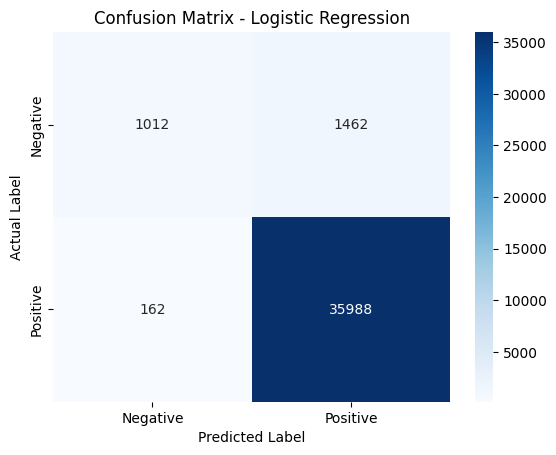

Model: MultinomialNB()
Confusion Matrix: 
[[    5  2469]
 [    3 36147]]
Accuracy: 0.9359983429991715
Model: MultinomialNB()
Confusion Matrix: 
[[    5  2469]
 [    3 36147]]
Accuracy: 0.9359983429991715
Model: MultinomialNB()
Accuracy: 0.9359983429991715
Precision: 0.9360627719080175
Recall: 0.9999170124481328
F1 Score: 0.9669368429500039


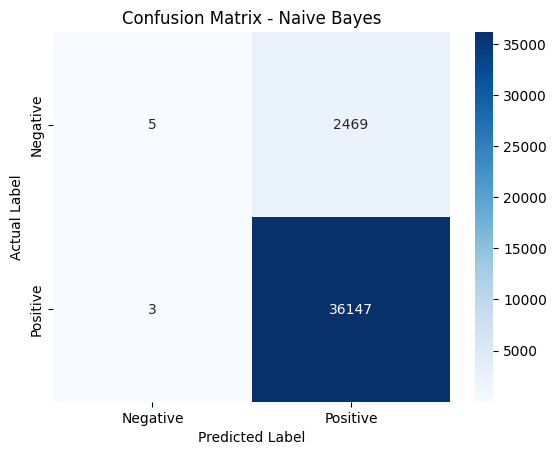

Model: SVC(C=0.1, kernel='linear')
Confusion Matrix: 
[[  416  2058]
 [   32 36118]]
Accuracy: 0.9458885666942833
Model: SVC(C=0.1, kernel='linear')
Confusion Matrix: 
[[  416  2058]
 [   32 36118]]
Accuracy: 0.9458885666942833
Model: SVC(C=0.1, kernel='linear')
Accuracy: 0.9458885666942833
Precision: 0.9460917854149203
Recall: 0.9991147994467496
F1 Score: 0.9718806339638888


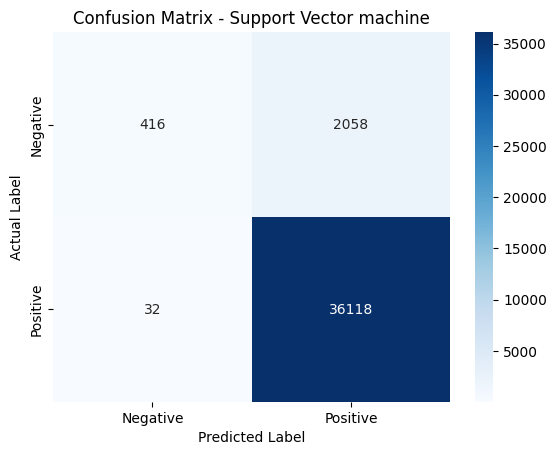

In [ ]:
for model_name, model in models:
    # Train the model
    model.fit(tf_x_train, y_train)

    # Evaluate the model
    y_pred = model.predict(tf_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Evaluate the model
    y_pred_tf = model.predict(tf_x_test)
    accuracy = accuracy_score(y_test, y_pred_tf)
    print(f"Model: {model}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tf)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_tf)}")

    # Evaluate the model
    y_pred_tf = model.predict(tf_x_test)
    accuracy = accuracy_score(y_test, y_pred_tf)
    precision = precision_score(y_test, y_pred_tf, pos_label='positive')
    recall = recall_score(y_test, y_pred_tf, pos_label='positive')
    f1 = f1_score(y_test, y_pred_tf, pos_label='positive')
    cm = confusion_matrix(y_test, y_pred_tf)

    # Print evaluation metrics
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

In [ ]:
df

,reviewText,clean_text,overall,sentiment
0,It's good for beginners,good beginner,5.0,positive
1,I recommend this starter Ukulele kit. I has e...,recommend starter ukulele kit everything need ...,5.0,positive
2,G'daughter received this for Christmas present...,gdaughter received christmas present last year...,5.0,positive
3,"According to my order history, I bought this t...",according order history bought kit towards end...,4.0,positive
4,Please pay attention better than I did to the ...,please pay attention better review poor qualit...,1.0,negative
...,...,...,...,...
231387,It's pretty great.,pretty great,5.0,positive
231388,Good inexpensive wiring harness. It will do th...,good inexpensive wiring harness job,5.0,positive
231389,Easily installed and worked as expected.,easily installed worked expected,4.0,positive
231390,The description stated they were full size pot...,description stated full size pot sent back,1.0,negative


##VADER and TEXTBLOB

### Text Blob with *CLEAN TEXT*

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# create a test dataframe
df_test_textblob = pd.DataFrame({'clean_text': X_test['clean_text'], 'sentiment': y_test})

In [ ]:
# Sentiment Analysis with TextBlob and wşth clean text
def sentiment_analysis_textblob(text):
    return TextBlob(text).sentiment.polarity

df_test_textblob['textblob_sentiment'] = df_test_textblob['clean_text'].apply(sentiment_analysis_textblob)


In [ ]:
# perform sentiment analysis on the test data
df_test_textblob['textblob_sentiment'] = df_test_textblob['clean_text'].apply(sentiment_analysis_textblob)

# create conditions for TextBlob
conditions = [
    (df_test_textblob['textblob_sentiment'] < 0),
    (df_test_textblob['textblob_sentiment'] > 0),
    (df_test_textblob['textblob_sentiment'] == 0) & (df_test_textblob['sentiment'] == 'positive'),
    (df_test_textblob['textblob_sentiment'] == 0) & (df_test_textblob['sentiment'] == 'negative')
]

# create sentiment values for each condition
values = ['negative', 'positive', 'positive', 'negative']

# create a new column and use np.select to assign values to it using the lists as arguments
df_test_textblob['TextBlob Analysis'] = np.select(conditions, values)
# display updated DataFrame
df_test_textblob.head()

,clean_text,sentiment,textblob_sentiment,TextBlob Analysis
40366,great string,positive,0.800000,positive
152323,great item fast deliverwey,positive,0.500000,positive
147407,great way keep real simple easy recording guit...,positive,0.249784,positive
217148,astonished tone didgeridoo super strong well m...,positive,0.382381,positive
122496,great fret wire really high quality rolled rid...,positive,0.486667,positive


TextBlob Metrics:
Confusion Matrix: 
[[  946  1528]
 [ 1574 34576]]
Accuracy: 0.9196872410936205
TextBlob Metrics:
Confusion Matrix: 
[[  946  1528]
 [ 1574 34576]]
Accuracy: 0.9196872410936205
Model: SVC(C=0.1, kernel='linear')
Accuracy: 0.9196872410936205
Precision: 0.9576778196321737
Recall: 0.9564591977869986
F1 Score: 0.9570681207960805


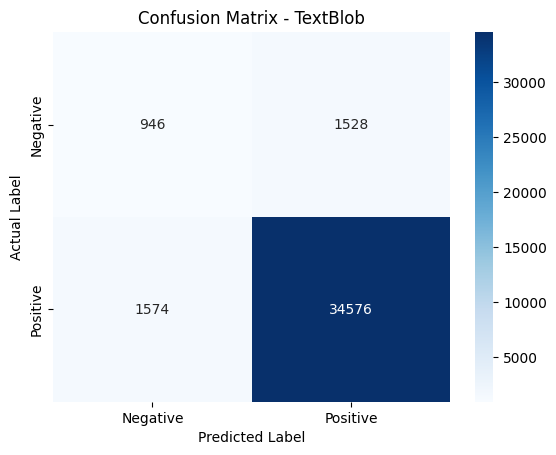

In [ ]:
# For TextBlob
print("TextBlob Metrics:")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, df_test_textblob['TextBlob Analysis'])}")
print(f"Accuracy: {accuracy_score(y_test, df_test_textblob['TextBlob Analysis'])}")


print("TextBlob Metrics:")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, df_test_textblob['TextBlob Analysis'])}")
print(f"Accuracy: {accuracy_score(y_test, df_test_textblob['TextBlob Analysis'])}")

    # Evaluate the model

accuracy = accuracy_score(y_test, df_test_textblob['TextBlob Analysis'])
precision = precision_score(y_test, df_test_textblob['TextBlob Analysis'], pos_label='positive')
recall = recall_score(y_test, df_test_textblob['TextBlob Analysis'], pos_label='positive')
f1 = f1_score(y_test, df_test_textblob['TextBlob Analysis'], pos_label='positive')
cm = confusion_matrix(y_test, df_test_textblob['TextBlob Analysis'])

# Print evaluation metrics
print(f"Model: {model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

    # Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
plt.title(f"Confusion Matrix - TextBlob")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


### VADER with Review Text (*NOT CLEAN TEXT*)

In [ ]:
# 3. Apply VADER on the test set
df_test_vader = pd.DataFrame({'reviewText': X_test['reviewText'], 'sentiment': y_test})

In [ ]:
# Sentiment Analysis with not clean dataset Vader

def sentiment_analysis_vader(text):
    analyser = SentimentIntensityAnalyzer()
    return analyser.polarity_scores(text)['compound']

df_test_vader['vader_sentiment_not_clean'] = df_test_vader['reviewText'].apply(sentiment_analysis_vader)




In [ ]:
# create a list of conditions for Vader
conditions2 =[
    (df_test_vader['vader_sentiment_not_clean'] < 0),
    (df_test_vader['vader_sentiment_not_clean'] > 0),
    (df_test_vader['vader_sentiment_not_clean'] == 0) & (df_test_vader['sentiment'] == 'positive'),
    (df_test_vader['vader_sentiment_not_clean'] == 0) & (df_test_vader['sentiment'] == 'negative')
    ]

# create a list of sentiment value to assign for each condition
values = ['negative', 'positive', 'positive', 'negative']

# create a new column and use np.select to assign values to it using the above lists as arguments
df_test_vader['VADER Analysis NC'] = np.select(conditions2, values)

# display updated DataFrame
df_test_vader.head()

,reviewText,sentiment,vader_sentiment_not_clean,VADER Analysis NC
40366,great strings,positive,0.6249,positive
152323,great item and fast deliverwey,positive,0.6249,positive
147407,Great way to keep it real simple and easy whil...,positive,0.9647,positive
217148,I am astonished at the tone of this Didgeridoo...,positive,0.9677,positive
122496,great fret wire.. really high quality. they ro...,positive,0.8553,positive


Vader Metrics:
Confusion Matrix: 
[[ 1124  1350]
 [ 1921 34229]]
Accuracy: 0.9153117232808616
Vader Metrics:
Confusion Matrix: 
[[ 1124  1350]
 [ 1921 34229]]
Accuracy: 0.9153117232808616
Model: SVC(C=0.1, kernel='linear')
Accuracy: 0.9153117232808616
Precision: 0.9620562691475308
Recall: 0.9468603042876902
F1 Score: 0.9543978028412496


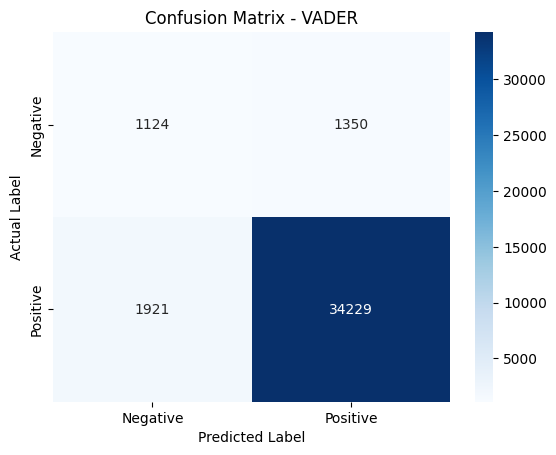

In [ ]:
# For Vader
print("Vader Metrics:")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,df_test_vader['VADER Analysis NC'])}")
print(f"Accuracy: {accuracy_score(y_test,df_test_vader['VADER Analysis NC'])}")


print("Vader Metrics:")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,df_test_vader['VADER Analysis NC'])}")
print(f"Accuracy: {accuracy_score(y_test,df_test_vader['VADER Analysis NC'])}")

    # Evaluate the model

accuracy = accuracy_score(y_test,df_test_vader['VADER Analysis NC'])
precision = precision_score(y_test,df_test_vader['VADER Analysis NC'], pos_label='positive')
recall = recall_score(y_test,df_test_vader['VADER Analysis NC'], pos_label='positive')
f1 = f1_score(y_test,df_test_vader['VADER Analysis NC'], pos_label='positive')
cm = confusion_matrix(y_test,df_test_vader['VADER Analysis NC'])

    # Print evaluation metrics
print(f"Model: {model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

    # Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
plt.title(f"Confusion Matrix - VADER")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()